In [1]:
from results_loader import load_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reset_index makes a column called "index" with the column index
df = load_data('nontesting_most_downloads').reset_index()

In [3]:
def maybe_dictionary_len(d):
    if d != None:
        num_non_link = 0
        for k in d:
            dep_data = d[k]
            if not ("link" in dep_data and dep_data["link"]):
                num_non_link = num_non_link + 1
        return num_non_link
    else:
        return np.nan
        
df['npm_number_deps'] = df['npm solve'].apply(maybe_dictionary_len)
df['rosette_number_deps'] = df['rosette solve'].apply(maybe_dictionary_len)

In [4]:
df['ratio_num_deps'] = df['rosette_number_deps']/df['npm_number_deps']

In [5]:
df['ratio'] = df['rosette time'] / df['npm time']

In [6]:
df

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
0,0,supports-color,True,17.038827,"{'node_modules/has-flag': {'version': '5.0.1',...",None,True,2.670986,"{'node_modules/has-flag': {'version': '5.0.0',...",None,1.0,1.0,1.0,0.156759
1,1,debug,True,16.933676,"{'node_modules/ms': {'version': '2.1.2', 'reso...",None,True,2.351109,"{'node_modules/ms': {'version': '2.1.2', 'inte...",None,1.0,1.0,1.0,0.138842
2,2,semver,True,4.659977,{'node_modules/lru-cache': {'version': '6.0.0'...,None,True,2.381426,{'node_modules/lru-cache': {'version': '6.0.0'...,None,2.0,2.0,1.0,0.511038
3,3,chalk,True,10.882163,{'node_modules/ansi-styles': {'version': '4.3....,None,True,3.595008,{'node_modules/ansi-styles': {'version': '4.1....,None,5.0,5.0,1.0,0.330358
4,4,ms,True,4.156216,{},None,True,2.125782,{},None,0.0,0.0,NaN,0.511471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,is-directory,True,2.906567,{},None,True,2.175580,{},None,0.0,0.0,NaN,0.748505
996,996,whatwg-fetch,True,6.489405,{},None,True,2.130667,{},None,0.0,0.0,NaN,0.328330
997,997,decimal.js,True,0.400362,{},None,True,2.159171,{},None,0.0,0.0,NaN,5.393040
998,998,lodash.merge,True,0.394715,{},None,True,2.119727,{},None,0.0,0.0,NaN,5.370275


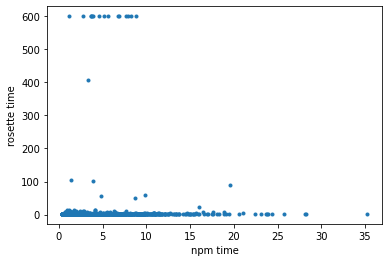

In [7]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.show()

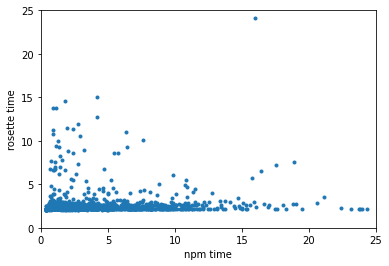

In [8]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.ylim([0, 25])
plt.xlim([0, 25])
plt.show()

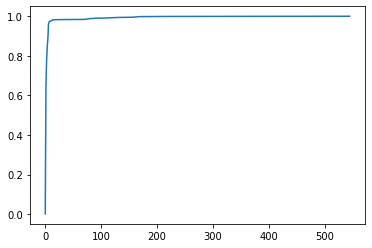

In [9]:
plt.plot(np.sort(df['ratio']), np.arange(1, len(df)+1)/len(df))
plt.show()

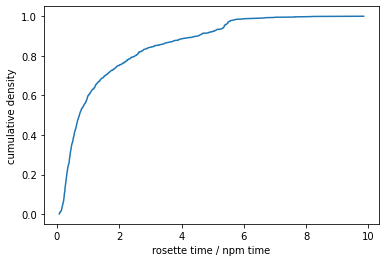

In [10]:
non_outlier_ratio = df['ratio'][df['ratio'] < 10]

plt.plot(np.sort(non_outlier_ratio), np.arange(1, len(non_outlier_ratio)+1)/len(non_outlier_ratio))
plt.xlabel('rosette time / npm time')
plt.ylabel('cumulative density')
plt.show()

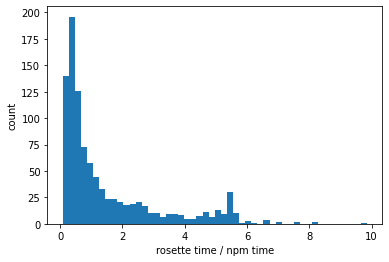

In [11]:
plt.hist(non_outlier_ratio, bins=50)
plt.xlabel('rosette time / npm time')
plt.ylabel('count')
plt.show()

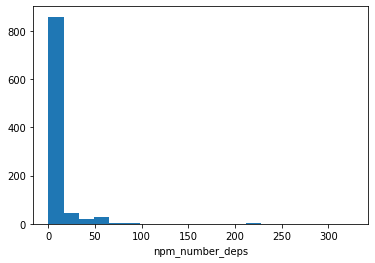

In [12]:
plt.hist(df['npm_number_deps'], bins=20)
plt.xlabel('npm_number_deps');

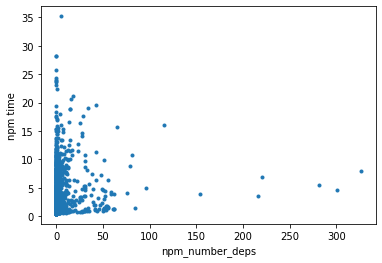

In [13]:
plt.scatter(x=df['npm_number_deps'], y=df['npm time'], marker='.')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('npm time') #y label
plt.show()

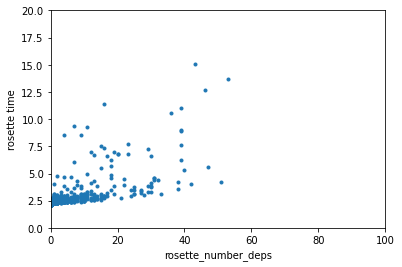

In [14]:
plt.scatter(x=df['rosette_number_deps'], y=df['rosette time'], marker='.')
plt.xlabel('rosette_number_deps') #x label
plt.ylabel('rosette time') #y label
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.show()

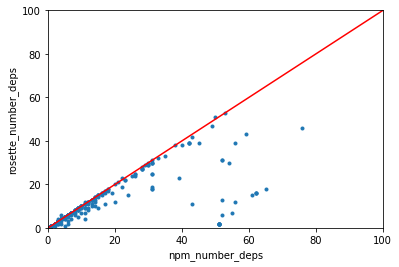

In [15]:
plt.scatter(x=df['npm_number_deps'], y=df['rosette_number_deps'], marker='.')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('rosette_number_deps') #y label
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

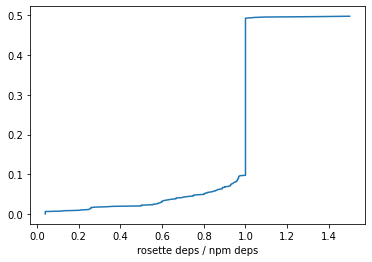

In [16]:
plt.plot(np.sort(df['ratio_num_deps']), np.arange(1, len(df['ratio_num_deps'])+1)/len(df['ratio_num_deps']))
plt.xlabel('rosette deps / npm deps')
plt.show()

In [17]:
df[(df['rosette success'] == False) & df['npm success']].sort_values('npm_number_deps')

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
50,50,fs-extra,True,8.549419,{'node_modules/graceful-fs': {'version': '4.2....,None,False,2.184626,None,"{'stage': 'install', 'command': 'npm install -...",3.0,NaN,NaN,0.255529
280,280,dom-serializer,True,4.732515,{'node_modules/domelementtype': {'version': '2...,None,False,2.176780,None,"{'stage': 'install', 'command': 'npm install -...",3.0,NaN,NaN,0.459963
295,295,terser,True,4.052353,{'node_modules/buffer-from': {'version': '1.1....,None,False,2.201325,None,"{'stage': 'install', 'command': 'npm install -...",5.0,NaN,NaN,0.543221
441,441,htmlparser2,True,3.553952,{'node_modules/dom-serializer': {'version': '1...,None,False,2.309703,None,"{'stage': 'install', 'command': 'npm install -...",6.0,NaN,NaN,0.649897
482,482,unset-value,True,1.430401,{'node_modules/get-value': {'version': '3.0.1'...,None,False,2.180292,None,"{'stage': 'install', 'command': 'npm install -...",6.0,NaN,NaN,1.524252
808,808,create-ecdh,True,8.239763,"{'node_modules/bn.js': {'version': '4.12.0', '...",None,False,2.938243,None,"{'stage': 'install', 'command': 'npm install -...",8.0,NaN,NaN,0.356593
162,162,find-cache-dir,True,5.425197,{'node_modules/commondir': {'version': '1.0.1'...,None,False,2.281953,None,"{'stage': 'install', 'command': 'npm install -...",10.0,NaN,NaN,0.420621
968,968,@istanbuljs/load-nyc-config,True,8.693694,{'node_modules/argparse': {'version': '1.0.10'...,None,False,49.582789,None,"{'stage': 'install', 'command': 'npm install -...",13.0,NaN,NaN,5.703305
882,882,tar-stream,True,2.425313,{'node_modules/base64-js': {'version': '1.5.1'...,None,False,2.391804,None,"{'stage': 'install', 'command': 'npm install -...",13.0,NaN,NaN,0.986184
352,352,send,True,3.553832,"{'node_modules/debug': {'version': '2.6.9', 'r...",None,False,2.319268,None,"{'stage': 'install', 'command': 'npm install -...",18.0,NaN,NaN,0.652610


In [18]:
df[df['npm_number_deps'] < df['rosette_number_deps']]

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
267,267,inquirer,True,4.661160,{'node_modules/ansi-escapes': {'version': '4.3...,None,True,4.234227,{'node_modules/ansi-escapes': {'version': '4.2...,None,50.0,51.0,1.020000,0.908406
579,579,@babel/plugin-transform-regenerator,True,1.175446,{'node_modules/@babel/runtime': {'version': '7...,None,True,2.936475,{'node_modules/regenerator-transform': {'versi...,None,3.0,4.0,1.333333,2.498179
667,667,wide-align,True,2.865605,{'node_modules/ansi-regex': {'version': '3.0.0...,None,True,2.447098,{'node_modules/string-width': {'version': '1.0...,None,4.0,6.0,1.500000,0.853955
754,754,jest-each,True,0.743430,{'node_modules/@jest/types': {'version': '27.2...,None,True,7.670850,{'node_modules/@jest/types': {'version': '27.1...,None,22.0,23.0,1.045455,10.318185
861,861,compression,True,6.407093,"{'node_modules/accepts': {'version': '1.3.7', ...",None,True,3.134862,"{'node_modules/accepts': {'version': '1.3.5', ...",None,11.0,12.0,1.090909,0.489280
